# Classification model

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import pkg_resources
root_packages = ['pandas', 'matplotlib', 'seaborn', 'numpy', 'scikit-learn']

for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

seaborn==0.10.1
scikit-learn==0.24.1
pandas==1.1.4
numpy==1.20.1
matplotlib==3.2.2


In [2]:
SEED = 1

## Data Preparation

In [52]:
url = "https://raw.githubusercontent.com/jamestgodwin/synthetic_data/main/data/back_pain.csv"
df = pd.read_csv(url) # download heart dataset
attr = df[df.columns[1:13]]
target = df[df.columns[13]]

#X_train, X_test, y_train, y_test = train_test_split(attr, 
                                                    #target, 
                                                   # test_size=0.33, 
                                                  #  random_state=SEED)
col_list = list(df.iloc[:, -1].dropna().unique())
col_list = [c.split('=')[-1] for c in col_list]
del col_list[0]

df = df.iloc[:, :-1]
df.columns = col_list

df.loc[df['Attribute class {Abnormal, Normal} '] == 'Abnormal',\
              'Attribute class {Abnormal, Normal} '] = 0
df.loc[df['Attribute class {Abnormal, Normal} '] != 0,\
              'Attribute class {Abnormal, Normal} '] = 1

raw_X = df[df.columns[0:12]]
raw_y = df[df.columns[12]]

## Helper functions

In [33]:
def get_preds(model, X_test):
    return model.predict(X_test)

def get_metric_scores(y_test, preds):
    acc = metrics.accuracy_score(y_test, preds)
    prec = metrics.precision_score(y_test, preds) 
    rec = metrics.recall_score(y_test, preds)
    return [acc, prec, rec]

def get_roc(y_test, preds, label):
    fpr, tpr, thresh = metrics.roc_curve(y_test, preds)
    auc = metrics.roc_auc_score(y_test, preds)
    plt.plot(fpr,tpr,label= str(label) + " AUC = " + str(auc))
    plt.legend(loc=0)

In [10]:
def get_models(X_train, y_train, random_state=SEED):
    lrm = LogisticRegression(random_state=SEED).fit(X_train, y_train)
    rfm = RandomForestClassifier(random_state=SEED).fit(X_train, y_train)
    nnm = MLPClassifier(random_state=SEED).fit(X_train, y_train)
    return lrm, rfm, nnm

def get_comparison_grid(models, X_test, y_test, _type):
    preds = []
    scores = []

    for i in models:
        preds.append(get_preds(i, X_test))

    for i in preds:
        scores.append(get_metric_scores(y_test, i))
        
    scores = pd.DataFrame(scores)
    scores.columns =['Accuracy', 'Precision', 'Recall']
    scores.index = [_type+' Logistic Regression', _type+' Random Forest', _type+' Neural Network']
    return scores

def create_matrix(y_test, preds, model):
    cm = metrics.confusion_matrix(y_test, preds)
    cm = pd.DataFrame(cm, index=['Diseased', 'Not-diseased'], columns=['Diseased', 'Not-diseased'])
    sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    plt.title(f'Confusion Matrix: {model}');

## ML Evaluation - synthetic data generation via PCA 

### Data generation

In [53]:
syn_X = 1 # synthetic attributes 
syn_y = 1 # synthetic targets

## initalise for synthetic datasets

### Training and evaluation

In [11]:
models = get_models(X_syn, y_syn, random_state=SEED) # train models

preds_raw = [] # test data, ie the raw data
preds_syn = [] # train data, ie the synthetic data
for i in models:
    preds_raw.append(get_preds(i, X_raw))
    preds_syn.append(get_preds(i, X_syn))
    
a = get_comparison_grid(models, X_raw, y_raw, 'Raw - ')
b = get_comparison_grid(models, X_syn, y_syn, 'Syn. - ')
pd.concat([a,b])

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall
Test - Logistic Regression,0.790000,0.779661,0.851852
Test - Random Forest,0.760000,0.777778,0.777778
Test - Neural Network,0.570000,0.677419,0.388889
Train - Logistic Regression,0.881773,0.865546,0.927928
Train - Random Forest,1.000000,1.000000,1.000000
Train - Neural Network,0.679803,0.773810,0.585586


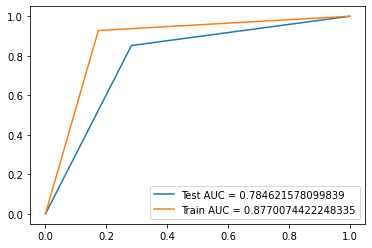

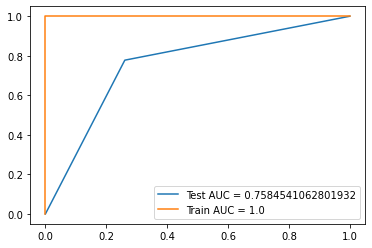

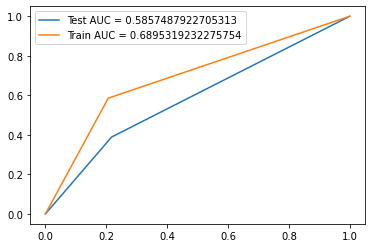

In [35]:
for i,j in zip(preds_raw, preds_syn):
    fig, ax = plt.subplots(1, 1)
    get_roc(y_raw, i, 'Raw')
    get_roc(y_syn, j, 'Syn.')

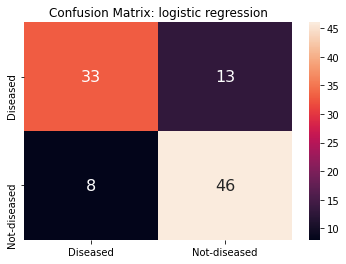

In [15]:
create_matrix(y_raw, preds_raw[0], 'logistic regression')

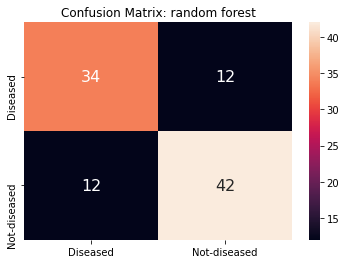

In [12]:
create_matrix(y_raw, preds_raw[1], 'random forest')

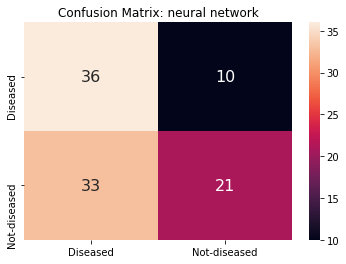

In [13]:
create_matrix(y_raw, preds_raw[2], 'neural network')

## ML Evaluation - synthetic data generation via SMOTE

### Data generation

In [54]:
syn_X = 1 # synthetic attributes 
syn_y = 1 # synthetic targets

## initalise for synthetic datasets

### Training and evaluation

In [55]:
models = get_models(X_syn, y_syn, random_state=SEED) # train models

preds_raw = [] # test data, ie the raw data
preds_syn = [] # train data, ie the synthetic data
for i in models:
    preds_raw.append(get_preds(i, X_raw))
    preds_syn.append(get_preds(i, X_syn))
    
a = get_comparison_grid(models, X_raw, y_raw, 'Raw - ')
b = get_comparison_grid(models, X_syn, y_syn, 'Syn. - ')
pd.concat([a,b])

NameError: name 'X_syn' is not defined

In [ ]:
for i,j in zip(preds_raw, preds_syn):
    fig, ax = plt.subplots(1, 1)
    get_roc(y_raw, i, 'Raw')
    get_roc(y_syn, j, 'Syn.')

In [ ]:
create_matrix(y_raw, preds_raw[0], 'logistic regression')

In [ ]:
create_matrix(y_raw, preds_raw[1], 'random forest')

In [ ]:
create_matrix(y_raw, preds_raw[2], 'neural network')

## ML Evaluation - synthetic data generation via CTGAN

### Data generation

In [56]:
syn_X = 1 # synthetic attributes 
syn_y = 1 # synthetic targets

## initalise for synthetic datasets

### Training and evaluation

In [ ]:
models = get_models(X_syn, y_syn, random_state=SEED) # train models

preds_raw = [] # test data, ie the raw data
preds_syn = [] # train data, ie the synthetic data
for i in models:
    preds_raw.append(get_preds(i, X_raw))
    preds_syn.append(get_preds(i, X_syn))
    
a = get_comparison_grid(models, X_raw, y_raw, 'Raw - ')
b = get_comparison_grid(models, X_syn, y_syn, 'Syn. - ')
pd.concat([a,b])

In [ ]:
for i,j in zip(preds_raw, preds_syn):
    fig, ax = plt.subplots(1, 1)
    get_roc(y_raw, i, 'Raw')
    get_roc(y_syn, j, 'Syn.')

In [ ]:
create_matrix(y_raw, preds_raw[0], 'logistic regression')

In [ ]:
create_matrix(y_raw, preds_raw[1], 'random forest')

In [ ]:
create_matrix(y_raw, preds_raw[2], 'neural network')